## 프로젝트1. 당뇨병 환자 데이터(diabetes)와 다중 선형 회귀

### 데이터 상세 페이지
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [33]:
from sklearn.datasets import load_diabetes
import math
import matplotlib.pyplot as plt
import numpy as np

diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [34]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [35]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [36]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [37]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [38]:
df_X = diabetes.data
df_y = diabetes.target

In [39]:
import pandas as pd

df = pd.DataFrame(data=df_X, columns=diabetes.feature_names)

df['label'] = df_y

In [40]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  label   442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [42]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'label'], dtype='object')

In [43]:
# 모델에 입력할 df_X와 df_y 재설정 
# 1차는 우선 기존에 있는 독립변수 전부 사용 
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
y = df['label'].values

df_X = X
df_y = y

In [44]:
#노드 요청사항
type(df_y)

numpy.ndarray

In [45]:
len(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

10

In [46]:
import matplotlib.pyplot as plt

%matplotlib inline 
%config InlineBackend.ffigure_format = 'retina' #해상도 출력

#plt.scatter(df)
#plt.show()

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, 
                                                    df_y, 
                                                    test_size=0.2, 
                                                    random_state=10 
                                                    )

In [48]:
#모델 준비
## w,b에 대한 임이의 초기 파라미터 설정
import numpy as np

#numpy seed값 설정
np.random.seed(42)

W = np.random.rand(10)
b = np.random.rand()

print(W,b) 

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258] 0.020584494295802447


In [49]:
X_train = X_train.to_numpy()
#y_train.to_numpy()


print(X_train.shape)
print(y_train.shape)
# 'numpy.ndarray' object has no attribute 'types'
## dataframe에서 array로 변환 완료

#print(X_train.types)
print(y_train.dtype)


(353, 10)
(353,)
float64


In [50]:
#모델 생성 (다중회귀모델)
def model(X, W, b):
    predictions = 0
    for i in range(10):
    #w1*x1 + w2*x2 + w3*x3 + w4*x4 + ..... + wi*xi + b
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

#모델의 손실함수는 mse로 설정
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [51]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    # 여기에 sum이 없는 이유는 뭐지? dot 계산에 sum도 포함
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [52]:
#learning rate는 0.001로하고
# 경사하강법을 이용해서 손실함수를 최소화하는 최적의 파라미터 찾기
lr  = 0.0001

losses = []

#에폭 : 1000
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= lr * dW
    b -= lr * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 29112.1816
Iteration 20 : Loss 29015.9955
Iteration 30 : Loss 28920.1865
Iteration 40 : Loss 28824.7529
Iteration 50 : Loss 28729.6933
Iteration 60 : Loss 28635.0062
Iteration 70 : Loss 28540.6901
Iteration 80 : Loss 28446.7436
Iteration 90 : Loss 28353.1651
Iteration 100 : Loss 28259.9533
Iteration 110 : Loss 28167.1067
Iteration 120 : Loss 28074.6238
Iteration 130 : Loss 27982.5031
Iteration 140 : Loss 27890.7433
Iteration 150 : Loss 27799.3429
Iteration 160 : Loss 27708.3004
Iteration 170 : Loss 27617.6145
Iteration 180 : Loss 27527.2837
Iteration 190 : Loss 27437.3067
Iteration 200 : Loss 27347.6819
Iteration 210 : Loss 27258.4081
Iteration 220 : Loss 27169.4838
Iteration 230 : Loss 27080.9077
Iteration 240 : Loss 26992.6783
Iteration 250 : Loss 26904.7943
Iteration 260 : Loss 26817.2542
Iteration 270 : Loss 26730.0569
Iteration 280 : Loss 26643.2008
Iteration 290 : Loss 26556.6846
Iteration 300 : Loss 26470.5070
Iteration 310 : Loss 26384.6666
Iteration 320 : L

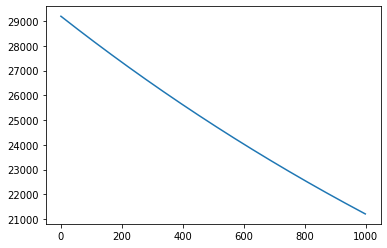

In [53]:
# 모델학습 loss 시각화

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()


In [54]:
#최적의 파라미터
W, b

(array([  6.35690949,   3.06637118,  15.43291194,  11.12254877,
          6.16184542,   5.28034777, -11.74480801,  13.57938735,
         15.78388463,  10.75614606]), 27.730451098758422)

In [55]:
print(type(X_test))
print(type(y_test))

print(X_test.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(89, 10)
(89,)


In [56]:
X_test = X_test.to_numpy()
# y_test = y_test.to_numpy()

In [57]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

20760.800617745077

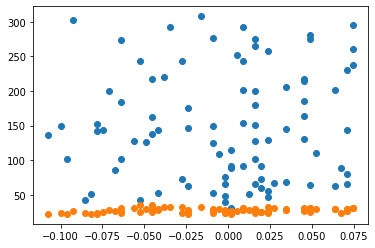

In [58]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()